<a href="https://colab.research.google.com/github/satyam-jaat/15_Supervised_Learning_Projects/blob/main/01_Boston_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the required libraries


In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn ipywidgets


# Setup and Imports:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For interactive widgets
!pip install -q ipywidgets
import ipywidgets as widgets
from IPython.display import display

# Load and Explore Data:

In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


print("=== Dataset Overview ===")
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Summary:\n")
print(df.info())
print("\nStatistical Summary:\n", df.describe())
print("\nMissing values:", df.isnull().sum().sum())

=== Dataset Overview ===
Shape: (506, 14)

First 5 rows:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Data Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64


# Visualize Correlation:

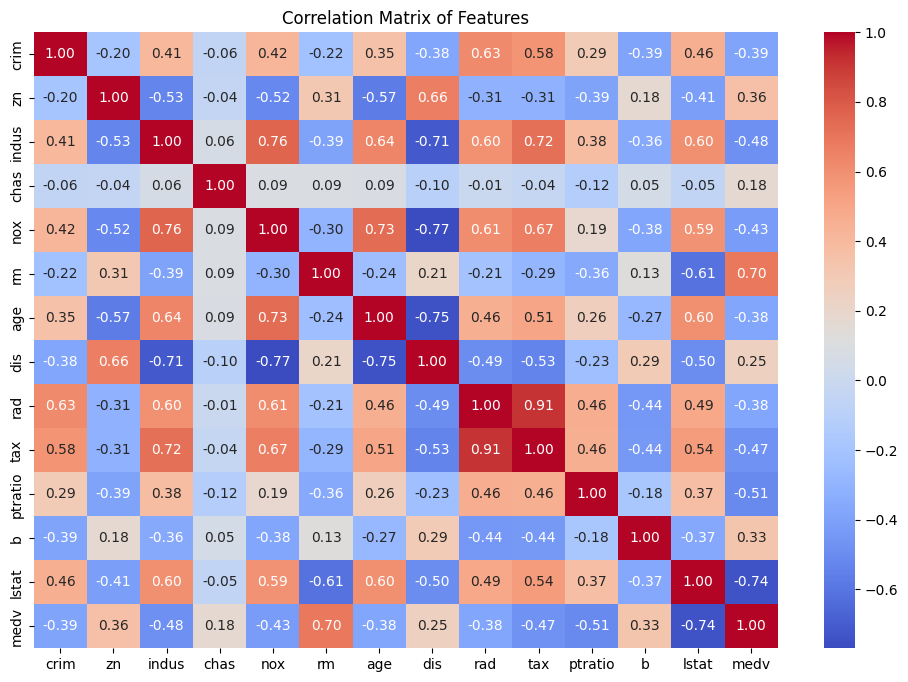

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Data Preprocessing:

In [6]:
X = df.drop('medv', axis=1)
y = df['medv'] * 1000  # Convert target to dollars

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Multiple Models:

In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

results = {}

print("\n=== Model Training and Evaluation ===")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R² Score': r2_score(y_test, y_pred)
    }

# Show model results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R² Score', ascending=False)

print("\nModel Performance Comparison:")
display(results_df)



=== Model Training and Evaluation ===

Model Performance Comparison:


,MSE,RMSE,MAE,R² Score
Random Forest,8.178673e+06,2859.837900,2029.715686,0.888473
Decision Tree,1.659912e+07,4074.201474,2595.098039,0.773650
Linear Regression,2.429112e+07,4928.602183,3189.091966,0.668759
Lasso Regression,2.429454e+07,4928.949381,3188.161567,0.668713
Ridge Regression,2.431290e+07,4930.811681,3185.723807,0.668462
Support Vector Regression,7.300618e+07,8544.365264,5933.465773,0.004467


from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['R² Score'].plot(kind='hist', bins=20, title='R² Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MSE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='MAE', y='R² Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSE']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('MSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSE']
  ys = series['R² Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('MSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('R² Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MSE'}, axis=1)
              .sort_values('MSE', ascending=True))
  xs = counted['MSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('MSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
results_df['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['R² Score'].plot(kind='line', figsize=(8, 4), title='R² Score')
plt.gca().spines[['top', 'right']].set_visible(False)

# Hyperparameter Tuning (Random Forest):

In [8]:
print("\n=== Hyperparameter Tuning (Random Forest) ===")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)



=== Hyperparameter Tuning (Random Forest) ===
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


# Feature Importance:

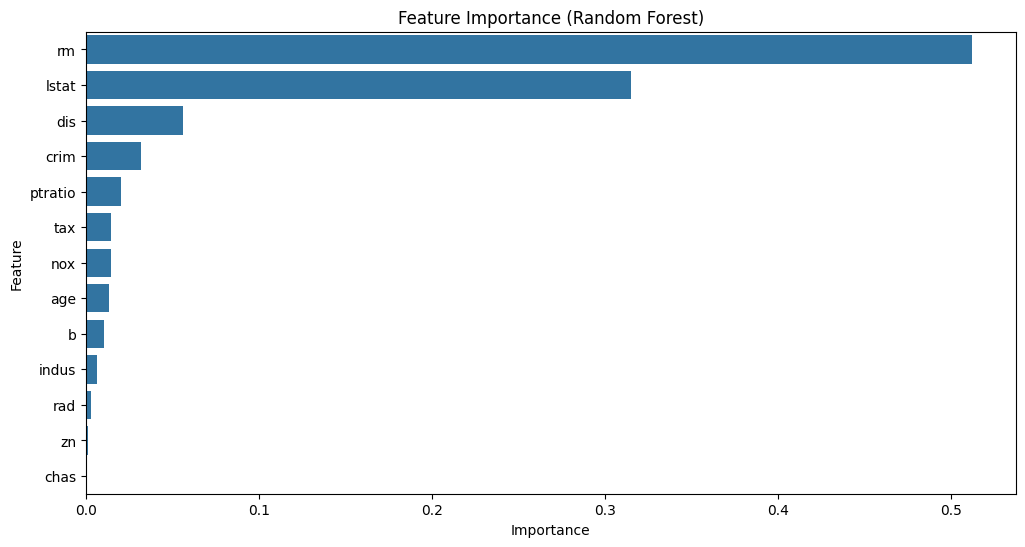

In [9]:
feature_importance = best_rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


# Interactive Prediction Tool:

In [10]:
print("\n=== Interactive Housing Price Predictor ===")

# Create input widgets
input_widgets = {
    'rm': widgets.FloatSlider(value=6, min=3, max=9, step=0.5, description='Avg rooms:'),
    'lstat': widgets.FloatSlider(value=12, min=2, max=38, step=1, description='Low status %:'),
    'ptratio': widgets.FloatSlider(value=19, min=12, max=22, step=0.5, description='Pupil-teacher ratio:'),
    'dis': widgets.FloatSlider(value=3.5, min=1, max=12, step=0.5, description='Distance to Employment:'),
    'nox': widgets.FloatSlider(value=0.5, min=0.3, max=0.9, step=0.05, description='Nitric oxide:'),
    'crim': widgets.FloatSlider(value=0.5, min=0, max=90, step=1, description='Crime rate:'),
    'chas': widgets.Dropdown(options=[0, 1], value=0, description='Near Charles River:')
}

# Default values for remaining features
default_values = {
    'zn': 0,
    'indus': 11,
    'age': 68,
    'rad': 5,
    'tax': 300,
    'b': 396
}

# Create form layout
form_items = [widgets.HTML(value="<h3>Enter Property Details:</h3>")]
form_items.extend(input_widgets.values())
form = widgets.VBox(form_items)

predict_btn = widgets.Button(description="Predict Price", button_style='success')
output = widgets.Output()

# Prediction function
def make_prediction(b):
    input_values = {**{k: w.value for k, w in input_widgets.items()}, **default_values}
    input_df = pd.DataFrame([input_values])[X.columns]
    scaled_input = scaler.transform(input_df)
    prediction = best_rf.predict(scaled_input)[0]

    output.clear_output()
    with output:
        print(f"\n🏠 Predicted Home Value: ${prediction:,.2f}")
        print("\n🔹 Key Factors Considered:")
        for key, value in input_values.items():
            print(f"- {key}: {value}")

predict_btn.on_click(make_prediction)

# Display form
display(widgets.VBox([form, predict_btn, output]))



=== Interactive Housing Price Predictor ===
